In [0]:
#This is a continuation from the MovieRecommender_DataPreparation.ipynb
#Reminder - run this notebook in high resource mode in CoLab

In [0]:
## Importing Packages
try:
    import pandas as pd 
except:
    !pip3 install pandas
    import pandas as pd 
try:
    import numpy as np
except:
    !pip3 install numpy
    import numpy as np
try:
    import warnings
except:
    !pip3 install warnings
    import warnings

warnings.filterwarnings('ignore')

In [0]:
## Import the movies and ratings data sets to review
DF = pd.read_csv('ratings.dat', sep=',') # names=['user_id','movie_id','rating',"timestamp"]
moviesDF = pd.read_csv('movies.dat', sep=',')

In [0]:
DF.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1.256677e+09
1,1,481,3.5,1.256677e+09
2,1,1091,1.5,1.256677e+09
3,1,1257,4.5,1.256677e+09
4,1,1449,4.5,1.256677e+09


In [0]:
moviesDF.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
#Explore the data to see if there are any null values in any of the dataframes
DF.isnull().sum().sum()

2

In [0]:
moviesDF.isnull().sum().sum()

0

There were no null values found in either of the dataframes, so no data cleaning was required.

In [0]:
## Merge the ratings and movies data frames using the movie id as the key.
DF = pd.merge(DF, moviesDF, on='movieId')
DF.head()

,userId,movieId,rating,timestamp,title,genres
0,1,307,3.5,1.256677e+09,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,8.320592e+08,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,1.383626e+09,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71,307,5.0,1.257795e+09,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84,307,3.0,9.990555e+08,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama


In [0]:
## Describing the dataset 
print("Dataframe info:")
print(DF.info())
print("Dataframe describe:")
print(DF.describe())


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1884817 entries, 0 to 1884816
Data columns (total 6 columns):
userId       int64
movieId      int64
rating       float64
timestamp    float64
title        object
genres       object
dtypes: float64(2), int64(2), object(2)
memory usage: 100.7+ MB
None
Dataframe describe:
             userId       movieId        rating     timestamp
count  1.884817e+06  1.884817e+06  1.884816e+06  1.884816e+06
mean   9.539215e+03  1.836990e+04  3.523149e+00  1.190934e+09
std    5.551242e+03  3.508770e+04  1.079838e+00  2.176142e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  8.228736e+08
25%    4.806000e+03  1.090000e+03  3.000000e+00  9.954266e+08
50%    9.463000e+03  2.700000e+03  3.500000e+00  1.170023e+09
75%    1.432000e+04  7.065000e+03  4.000000e+00  1.423094e+09
max    1.936300e+04  1.938610e+05  5.000000e+00  1.537932e+09


In [0]:
## Feature Engineering - Creating a dataframe for the average rating for each movie and the number of ratings in order to use later for the calculation of the correlation

ratings = pd.DataFrame(DF.groupby('title')['rating'].mean())
ratings['number_of_ratings'] = DF.groupby('title')['rating'].count()
ratings

,rating,number_of_ratings
title,,
"""Great Performances"" Cats (1998)",3.133333,15
#Horror (2015),1.000000,1
#realityhigh (2017),4.500000,2
$ (Dollars) (1971),3.000000,1
$5 a Day (2008),2.750000,4
...,...,...
Приключения Домовёнка (1986),5.000000,1
Сердца трех (1992),1.000000,1
Юленька (2009),3.250000,2


In [0]:
#Find the mean ratings per movie and sort from highest to lowest
ratings.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Detective Chinatown (2015)             5.0
CM Punk: Best in the World (2012)      5.0
Sweet Mud (Adama Meshuga'at) (2006)    5.0
One Last Thing... (2005)               5.0
Wifemistress (1977)                    5.0
Name: rating, dtype: float64

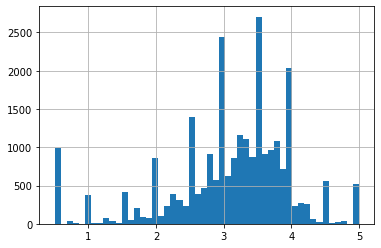

In [0]:
#Plot the ratings per movie on a historgram
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

From the histogram, it can be seen that the majority of movie ratings fall between 2.5 and 4.0

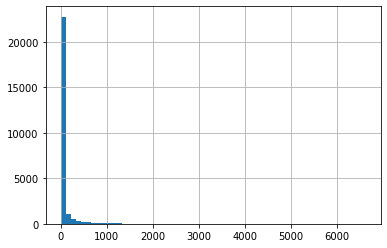

In [0]:
#Plot the histogram of the number of movie ratings per movie
ratings['number_of_ratings'].hist(bins=60)

The majority of movies have very few ratings

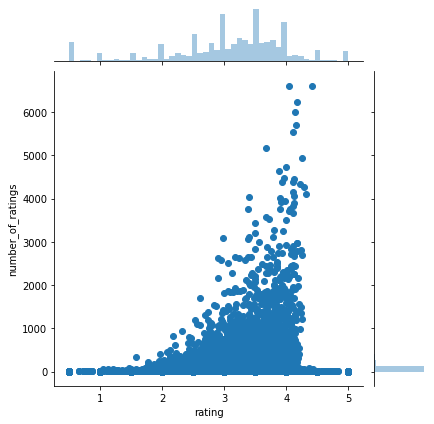

In [0]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

As seen from the seaborn plot, there is a positive correlation between the average ratings of a movie and the number of ratings. The more ratings a movie gets, the higher the average rating.

In [0]:
# Creating a movie rating matrix, logging users against the movie titles using the pandas pivot table functions. 

movie_matrix = DF.pivot_table(index='userId', columns='title', values='rating')

In [0]:
movie_matrix.head(10)

title,"""Great Performances"" Cats (1998)",#Horror (2015),#realityhigh (2017),$ (Dollars) (1971),$5 a Day (2008),$9.99 (2008),$ellebrity (Sellebrity) (2012),'71 (2014),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",'Pimpernel' Smith (1941),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),'Twas the Night Before Christmas (1974),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(A)sexual (2011),(Dis)Honesty: The Truth About Lies (2015),(T)ERROR (2015),(The New) War of the Buttons (2011),(Untitled) (2009),*batteries not included (1987),+1 (2013),...All the Marbles (1981),...And God Spoke (1993),...And Justice for All (1979),.45 (2006),009 Re: Cyborg (2012),1 (2013),1 (2014),1 Journée (2007),"1, 2, 3, Sun (Un, deuz, trois, soleil) (1993)",1-900 (06) (1994),1-Ichi (2003),10 (1979),10 Cloverfield Lane (2016),...,Zygote (2017),[REC] (2007),[REC] 4: Apocalypse (2014),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eCupid (2011),eXistenZ (1999),iBoy (2017),iMurders (2008),iSteve (2013),loudQUIETloud: A Film About the Pixies (2006),nWo: The Revolution (2012),unINDIAN (2015),xXx (2002),xXx: Return of Xander Cage (2017),xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),Ödipussi (1988),Üvegtigris (2001),İtirazım Var (2014),Ουζερί Τσιτσάνης,Каникулы президента (2018),Кентервильское привидение (1970),Мартынко (1987),Мафия (2016),Нас венчали не в церкви (1983),Никто не знает про секс (2006),Обезьянки и грабители (1985),Он вам не Димон (2017),Оно (1990),Поезд вне расписания (1986),Приключения Домовёнка (1986),Сердца трех (1992),Юленька (2009),Я худею (2018),チェブラーシカ (2010)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [0]:
#Look at the top ten movies by highest number of ratings
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
"Shawshank Redemption, The (1994)",4.416780,6609
Forrest Gump (1994),4.050736,6593
Pulp Fiction (1994),4.173438,6227
"Silence of the Lambs, The (1991)",4.133478,6001
"Matrix, The (1999)",4.150254,5707
Star Wars: Episode IV - A New Hope (1977),4.114038,5542
Jurassic Park (1993),3.666634,5167
Schindler's List (1993),4.252080,4927
Braveheart (1995),3.991547,4732


In [0]:
#Look at top ten rated movies
ratings.sort_values('rating', ascending=False).head(10)

,rating,number_of_ratings
title,,
All About Anna (2005),5.0,1
Donkey Hide (Oslinaya shkura) (1982),5.0,1
Spicy Love Soup (1997),5.0,1
Reincarnated (2012),5.0,1
Border (1997),5.0,1
Thru the Mirror (1936),5.0,1
Spoiler (1998),5.0,1
"Reef, The (2010)",5.0,1
Spring on Zarechnaya Street (1956),5.0,1


In [0]:
# Movie Selection: Any movie can be chosen at this stage. We decided to chose Pulp Fiction, but we will test with other movies later.
# Finding the correlation between the chosen movie and each movie in the movie_matrix

In [0]:
# Movie Title Search
moviesDF[moviesDF["title"].str.contains("Pulp Fiction")]

,movieId,title,genres
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [0]:
#Look for all user ratings for the movie Pulp Fiction
pulpfictionratings = movie_matrix['Pulp Fiction (1994)']
pulpfictionratings.head()

userId
1    NaN
2    NaN
3    NaN
4    5.0
5    5.0
Name: Pulp Fiction (1994), dtype: float64

In [0]:
#Correlation pulp fiction ratings with other movie ratings
movieslikepulp = movie_matrix.corrwith(pulpfictionratings)

In [0]:
#Creating a dataframe for the correlation
corr_movieslikepulp = pd.DataFrame(movieslikepulp, columns=['Correlation Rate'])

In [0]:
#Dropping null values and previewing the data frame
corr_movieslikepulp.dropna(inplace=True)
corr_movieslikepulp.head()

,Correlation Rate
title,
"""Great Performances"" Cats (1998)",-0.188982
$9.99 (2008),1.000000
'71 (2014),0.143230
'Hellboy': The Seeds of Creation (2004),0.000000
'Round Midnight (1986),0.555719


In [0]:
# Looking for the top correlated movies to Pulp Fiction by correlation rate
corr_movieslikepulp.sort_values('Correlation Rate', ascending=False).head(5)

,Correlation Rate
title,
Homicidal (1961),1.0
Hangin' with the Homeboys (1991),1.0
Somebody is Waiting (1996),1.0
Resurrection (1980),1.0
"Green Berets, The (1968)",1.0


In [0]:
#Create a recommendation data frame
recommendation = pd.DataFrame(corr_movieslikepulp,columns=['Correlation Rate'])
#Drop the null values in place
recommendation.dropna(inplace=True)
recommendation = recommendation.join(ratings['number_of_ratings'])
recommendation.head()

,Correlation Rate,number_of_ratings
title,,
"""Great Performances"" Cats (1998)",-0.188982,15
$9.99 (2008),1.000000,3
'71 (2014),0.143230,28
'Hellboy': The Seeds of Creation (2004),0.000000,13
'Round Midnight (1986),0.555719,12


In [0]:
recommendation.sort_values('Correlation Rate', ascending=False).head(10)

,Correlation Rate,number_of_ratings
title,,
Homicidal (1961),1.0,4
Hangin' with the Homeboys (1991),1.0,3
Somebody is Waiting (1996),1.0,2
Resurrection (1980),1.0,4
"Green Berets, The (1968)",1.0,3
"Chinoise, La (1967)",1.0,3
Never Die Alone (2004),1.0,3
Guinea Pig: Flowers of Flesh and Blood (Za ginipiggu 2: Chiniku no hana) (1985),1.0,3
Gun Woman (2014),1.0,3


Testing the model further - We can see that the top correlated movie may have a low number rates, for example when looking at Homicidal (1961), now lets look at movies that had more than 300 ratings but were still highly correlated

In [0]:
recommendation_output = recommendation[recommendation['number_of_ratings']>300].sort_values('Correlation Rate',ascending=False).reset_index()

In [0]:
recommendation_output.head()

,title,Correlation Rate,number_of_ratings
0,Pulp Fiction (1994),1.000000,6227
1,Reservoir Dogs (1992),0.487503,2447
2,Kill Bill: Vol. 1 (2003),0.477249,2397
3,Grindhouse (2007),0.457357,396
4,Kill Bill: Vol. 2 (2004),0.429782,2012


Pulp Fiction shows up as the highest correlation which is expected. The next best correlated movie would be Reservoir Dogs. 

In [0]:
recommendation_output = recommendation_output.merge(moviesDF,on='title', how='left')

In [0]:
print("Test Recommendations for: "+movieTitle)
recommendation_output.head(10)

Test Recommendations for: Pulp Fiction (1994)


,title,Correlation Rate,number_of_ratings,movieId,genres
0,Pulp Fiction (1994),1.000000,6227,296,Comedy|Crime|Drama|Thriller
1,Reservoir Dogs (1992),0.487503,2447,1089,Crime|Mystery|Thriller
2,Kill Bill: Vol. 1 (2003),0.477249,2397,6874,Action|Crime|Thriller
3,Grindhouse (2007),0.457357,396,52281,Action|Crime|Horror|Sci-Fi|Thriller
4,Kill Bill: Vol. 2 (2004),0.429782,2012,7438,Action|Drama|Thriller
5,Eastern Promises (2007),0.418916,331,55118,Crime|Drama|Thriller
6,The Hateful Eight (2015),0.418244,344,128360,Western
7,Goodfellas (1990),0.395136,2451,1213,Crime|Drama
8,Amores Perros (Love's a Bitch) (2000),0.388020,471,4235,Drama|Thriller
9,No Country for Old Men (2007),0.387940,1213,55820,Crime|Drama
